# TASK 1 - SQRT2

October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library1 or otherwise. You should research the task first and include references and a description of your algorithm.

In [1]:
def sqrt2(my_number): 
    # I researched how to do a nested function to encapsulate sqrt2 as the overarching function, outer / inner function 
    # see https://stackabuse.com/python-nested-functions/
    # my_number is 2, when the function sqrt2 is called sqrt2(2), see last line of code below


    x = my_number * 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    # Because Python does not do 100 decimal places, we multiply 2 to a really large integer, where the square root of this number will be an integer length of 101 characters
    # e.g. 14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
    # is square root of 200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    # The above could also be coded this way x = my_number * 10 ** 200
 
    r = x

    def test_diffs(x, r): 

        # test_diffs is the inner function of sqrt2, the code which I used for this inner function was given to me by expert on stackoverflow
        # https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra/64278569?noredirect=1#comment113668731_64278569
        # on my question on stackoverflow I describe the research I have done, and how far I got with a possible solution
        
        
        d0 = abs(x - r**2)
        dm = abs(x - (r-1)**2)
        dp = abs(x - (r+1)**2)
        minimised = d0 <= dm and d0 <= dp
        below_min = dp < dm
        return minimised, below_min

    while True:
        oldr = r # this is a variable used for keeping track of original numaber
        r = (r + x // r) // 2

        minimised, below_min = test_diffs(x, r)
        if minimised:
            break

        if r == oldr:
            if below_min:
                r += 1 # increment r by 1
            else:
                r -= 1 # decrease r by 1
            minimised, _ = test_diffs(x, r)

            if minimised:
                break

    # We could present answer using print formatting from original stackoverflow answer
    # https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra/64278569?noredirect=1#comment113668731_64278569
    # print(f'{r // 10**100}.{r % 10**100:0100d}')"""

    # Or we can code to convert the final number into a string, and separate the string into two parts and add a fullstop in the middle https://stackoverflow.com/questions/1228299/changing-one-character-in-a-string
    r = str(r)
    text = r[:1] + "." + r[1:]
    print(text)


sqrt2(2) # call the function sqrt

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


# Task 2 - CHI-SQUARED

November 2nd, 2020: The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell. https://en.wikipedia.org/wiki/Chi-squared_test

![table.png](table.png)

### Videos Watched

https://youtu.be/fMIwIKLGke0
associated Jupyter Notebook https://nbviewer.jupyter.org/github/bhattbhavesh91/chi-squared-feature-selection-selectkbest/blob/master/chi-squared-selectkbest-notebook.ipynb

This referenced use of 

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2


https://youtu.be/WXPBoFDqNVk <br>
https://youtu.be/Pbo7VbHK9cY <br>
https://youtu.be/I10q6fjPxJ0 <br>

At layman entry point into statistics, for me it was at first a daunting task to find for dummies statistical training guides on chi-squared test, and to apply that to the scipy.stats functions available.

### Written Sources of investigation

As the task assignment specifically referenced scipy.stats I checked Stackoverflow

https://stackoverflow.com/questions/44817281/performing-chi-squared-test-in-python

from scipy.stats import chisquare  
chisquare([ <your data points>])

I also checked the user manual.
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

I raised a question on Stackoverflow hoping that with expert advice, I could both broaden my understanding of the chi square test, and to use the best available scipy.stats function to reference the table data.
    
My question can be found here:
https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare
    
### My Question On Stackoverflow
    
Can someone help me with scipy.stats.chisquare? I do not have a statistical / mathematical background, and I am learning scipy.stats.chisquare with this data set from https://en.wikipedia.org/wiki/Chi-squared_test

The Wikipedia article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. I am to use scipy.stats to verify this value and calculate the associated p value.

![table.png](table.png)
    
I have found what looks like the most likely formula solutions to help me here

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

![chi_squared_solutions.png](chi_squared_solutions.png)  

As I am new to statistics, and also the use of scipy.stats.chisquare I am just not sure of the best approach, and how best to enter the data from provided table into the arrays, and whether to supply expected values? from Wikipedia.
    


### Final Solution from Stackoverflow

![table.png](table.png)


>> That data is a contingency table. SciPy has the function scipy.stats.chi2_contingency that applies the chi-square test to a contingency table. It is fundamentally just a reqular chi-square test, but when applied to a contingency table, the expected frequencies are calculated under the assumption of independence (chi2_contingency does this for you), and the degrees of freedom depends on the number of rows and columns (chi2_contingency calculates this for you, too).
>> Here's how you can apply the chi-square test to that table:
>> https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare/

From using the above answer, I didn't need to research further the expected frequencies for each category, because the chi2_contingency does this for you.
The chi2_contingency function also calulates the degrees of freedom.

As requested for this task, this chi2_contingency function was able to verify the value of 24.6 (24.571) and calculate the associated p value as 0.00040984

In [2]:
import numpy as np
from scipy.stats import chi2_contingency


# We use a multi dimensional data array from numpy to represent the table

table = np.array([[90, 60, 104, 95], # White collar
                  [30, 50,  51, 20], # Blue collar
                  [30, 40,  45, 35]]) # No collar

# the variables chi2, p, dof, expected

chi2, p, dof, expected = chi2_contingency(table) #chi2_contingency function from scipy.stats is applied to the table
    # the variables chi2, p, dof, expected - are the same as set out in the user guide url below                                              
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

"""
The .g used in the print formating stands for General format. 
General format: For a given precision p >= 1, this rounds the number to p significant digits and 
then formats the result in either fixed-point format or in scientific notation, depending on its magnitude."""


chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


'\nThe .g used in the print formating stands for General format. \nGeneral format: For a given precision p >= 1, this rounds the number to p significant digits and \nthen formats the result in either fixed-point format or in scientific notation, depending on its magnitude.'

In [3]:
import numpy as np
from scipy.stats import chi2_contingency


table = np.array([[90, 60, 104, 95],
                  [30, 50,  51, 20],
                  [30, 40,  45, 35]])

chi2, p, dof, expected = chi2_contingency(table)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


In [4]:
import numpy as np
import scipy.stats


table = np.array([[90, 60, 104, 95],
                  [30, 50,  51, 20],
                  [30, 40,  45, 35]])

chi2, p, dof, expected = scipy.stats.chi2_contingency(table)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


# Task 3 - CALCULATING STANDARD DEVIATION

November 16th, 2020: The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)). However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . 

The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . 

Research these Excel functions, writing a note in a Markdown cell about the difference between them. 

Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

# Why NumPy is better than Excel

![OriginalComparison.png](OriginalComparison.png)

### use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

After much research, I felt that the easiest way to show the reader the difference between how Standard Deviation is done with NumPy compared to how it is done with Excel, was to show a side by side comparison of the formulas and the results.

When you compare NumPy np.std(GROUP_X, ddof=1) to Excel =STDEV.S(C10:G10), NumPy gives accuracy to more decimal places.<br>
On the group of numbers in GROUP_X NumPy np.std(GROUP_X, ddof=1) gives the answer: 79.05694150420949<br>
On the group of numbers in GROUP_X Excel =STDEV.S(B10:F10) gives the answer:       79.0569415<br>

If you are look at the screenshot below, if you were to try and set Excel to show 14 decimal places, Excel would round up the 79.05694150420949 to 79.05694150420950, therefore proving NumPy is more precise.

![ExcelRoundsUp.png](ExcelRoundsUp.png)

**This concludes my observations for answering Task 3. My research notes for Task 3 can be found below.**

## WHAT IS THE PURPOSE OF STANDARD DEVIATION IN RESEARCH?

>Standard Deviation (often abbreviated as "Std Dev" or "SD") provides an indication of how far the individual responses to a question vary or "deviate" from the mean. SD tells the researcher how spread out the responses are -- are they concentrated around the mean, or scattered far & wide?
https://www.greenbook.org/marketing-research/how-to-interpret-standard-deviation-and-standard-error-in-survey-research-03377


## WHAT ARE THE USES OF STANDARD DEVIATION?

> Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean or expected value). A low standard deviation means that most of the numbers are close to the average, while a high standard deviation means that the numbers are more spread out.


https://simple.wikipedia.org/wiki/Standard_deviation

**Sometimes averages tell us very little about a group of numbers e.g. the average annual salary, some people are on minimum weekly wage, others are on fat cat salaries. The average annual salary often looks reasonable, however many live in extreme poverty while others are obscenely rich.**

**Look at the three group of numbers below, they all total 1000, they all average 200**
![Averages.png](Averages.png)

**The standard deviation formulas found in excel and in python modules such as NumPy help bring more meaning to analysing the numbers.**
![ExcelDeviations.png](ExcelDeviations.png)


### CALCULATING STANDARD DEVIATION FOR ENTIRE POPULATION DATA OR SAMPLE DATA?

To calculate the standard deviation of a group of numbers, the clue to how to use STDEV.P or STDEV.S is in the suffix. 


**STDEV. P** FOR AN ENTIRE POPULATION
> Work out the Mean (the simple average of the numbers)<br>
Then for each number: subtract the Mean and square the result.<br>
Then work out the mean of those squared differences.<br>
Take the square root of that and we are done!<br>
>https://www.mathsisfun.com/data/standard-deviation-formulas.html


**STDEV. S** FOR A SAMPLE POPULATION - KNOWN AS STDEV.S
>Sometimes our data is only a sample of the whole population.
>We can still estimate the Standard Deviation.
>But when we use the sample as an estimate of the whole population, the Standard Deviation formula changes to this:
>The formula for Sample Standard Deviation:
>![standard-deviation-sample.gif](standard-deviation-sample.gif)
>The important change is "N-1" instead of "N" (which is called "Bessel's correction").<BR>
>https://www.mathsisfun.com/data/standard-deviation-formulas.html



## CALCULATING STDEV.P AND STDEV.S MANUALLY WITH PYTHON / NUMPY

The formulas below show how you would do the above calculations with Python.

In [11]:
import numpy as np

# To calculate the standard deviation of an entire population e.g. STDEV.P
x = [100,200,300,150,250]
STDEVP = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
print("STDEV.P:",STDEVP)

# To calculate the standard deviation of a sample population e.g. STDEV.P
x = [100,200,300,150,250]
STDEVS = np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1)

print("STDEV.S:",STDEVS)

STDEV.P: 70.71067811865476
STDEV.S: 70.70360669725413


## CALCULATING STDEV.P AND STDEV.S EASILY WITH THE NUMPY MODULE OF PYTHON

However the above involve remembering some math and, the NumPy module of Python provides a shorthand way of doing the same calculation and getting the same result. 

https://numpy.org/doc/stable/reference/generated/numpy.std.html

We will be comparing the difference between NumPy and Excel.

In [12]:
import numpy as np
x = [100,200,300,150,250]

npstd = np.std(x, dtype=np.float64)

print(npstd)
print('Note when comparing the results above how NumPy np.std is basically the same as STDEV.P, this can be confusing because Excel STDEV is the same as STDEV.S')

70.71067811865476
Note when comparing the results above how NumPy np.std is basically the same as STDEV.P, this can be confusing because Excel STDEV is the same as STDEV.S


The STDEV. S function calculates the standard deviation in a sample set of data. Standard deviation is a measure of how much variance there is in a set of numbers compared to the average (mean) of the numbers. The STDEV. S function is meant to estimate standard deviation in a sample.

#https://stackoverflow.com/questions/34133939/is-there-any-difference-between-numpy-std-and-excel-stdev-function

There's a difference: Excel's STDEV calculates the sample standard deviation, while NumPy's std calculates the population standard deviation by default (it is behaving like Excel's STDEVP).

## To make NumPy's std function behave like Excel's STDEV, pass in the value ddof=1:

In [14]:
import numpy as np
group_x = [100,200,300,150,250]
group_y = [200,200,200,200,200]
group_z = [10,10,10,10,960]

a = np.std(group_x, ddof=1)
b = np.std(group_y, ddof=1)
c = np.std(group_z, ddof=1)


print(a)
print(b)
print(c)

#The Excel STDEV function returns the standard deviation for data that represents a sample. To calculate the standard deviation for an entire population, use STDEVP or STDEV. P.
#https://exceljet.net/excel-functions/excel-stdev-function

79.05694150420949
0.0
424.85291572496004


## Research these Excel functions, writing a note in a Markdown cell about the difference between them. 

SAMPLE
=STDEV.S(600,470,170,430,300)


POPULATION
np.std()
147.32277488562318



### STANDARD DEVIATION PERFORMED ON A POPULATION

## STDEV.P USED IN EXCEL
![STDEVP.png](STDEVP.png)
=STDEV.P(600,470,170,430,300)<br>
=STDEV.P(A3,B3,C3,D3,E3)<br>

RESULT<br>
147.3227749

## How To Do Standard Deviation In NumPy (equivalent to excel STDEV.P)

In [3]:
import numpy as np

a = np.array([100,200,300,150,250])
np.std(a)

70.71067811865476

### STANDARD DEVIATION PERFORMED ON A SAMPLE

## STDEV.S USED IN EXCEL
![STDEVS.png](STDEVS.png)
=STDEV.S(600,470,170,430,300)<br>
=STDEV.S(A3,B3,C3,D3,E3)

RESULT<br>
164.7118696

## STDEV USED IN EXCEL
![STDEV.png](STDEV.png)
=STDEV(600,470,170,430,300)<br>
=STDEV(A3,B3,C3,D3,E3)

RESULT<br>
164.7118696

## How To Do Standard Deviation In NumPy (equivalent to excel STDEV.S)

In [6]:
import numpy as np
s = [600,470,170,430,300]

np.std(s, ddof=1)


164.7118696390761

#https://numpy.org/doc/stable/reference/generated/numpy.std.html
Computing the standard deviation in float64 is more accurate:

>>>
np.std(a, dtype=np.float64)
0.44999999925494177 # may vary

In [7]:
import numpy as np
s = [600,470,170,430,300]

np.std(s, ddof=1, dtype=np.float64)

164.7118696390761

# Task 4
## Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set.

4. November 30th, 2020: Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Resources

https://www.youtube.com/watch?v=asW8tp1qiFQ<br>
https://www.youtube.com/watch?v=nlD8A-49Fc0<br>
https://www.youtube.com/watch?v=hd1W4CyPX58<br>
https://www.youtube.com/watch?v=I38fOLHC8zo<br>
https://www.youtube.com/watch?v=iMJZAWdQx7g<br>
https://www.youtube.com/watch?v=K1quNyRP86Q<br>
https://www.youtube.com/watch?v=VjPmHQyONYI<br>
https://github.com/palak2323/The-Spark-Foundation-internship-/blob/main/IRIS(KMEANS_CLUSTERING).ipynb<br>
https://gist.github.com/bbarrilleaux/9841297<br>
https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset<br>


In [7]:
#I watched the video https://www.youtube.com/watch?v=asW8tp1qiFQ, typed the code and added the narration comments and
#my own print statements to explain the code

from sklearn.datasets import load_iris #load inbuilt dataset from sklearn
iris = load_iris() #assign variable name iris to inbuilt dataset

iris.data # contains the four numeric variables, sepal length, sepal width, petal length, petal width
iris.target # relates to the different species shown as 0,1,2 for the three different   
            # species of Iris, a categorical variable, basically a label


print(iris.target)

print("""\nThe array above shows the three types of Iris flower. 
There are 150 Iris in the dataset, 50 of each Iris type.
all the zeros represent one Iris type,
all the ones represent another Iris type,
all the twos represent another Iris type""")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

The array above shows the three types of Iris flower. 
There are 150 Iris in the dataset, 50 of each Iris type.
all the zeros represent one Iris type,
all the ones represent another Iris type,
all the twos represent another Iris type


In [11]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #with KMeans you get to pre specify the number of Clusters


In [13]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
KModel = kmeans.fit(iris.data) #fit a model using the training data , in this case original Iris Data passed through

In [15]:
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
KModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

When you train the Iris Dataset

In [17]:
KModel.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
import pandas as pd
pd.crosstab(iris.target,KModel.labels_)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


------------------------------------------------------------

In [10]:
# Numerical arrays
import numpy as np

# Machine Learning - KMeans
import sklearn.cluster as skcl

# Plotting
import matplotlib.pyplot as plt



In [11]:
# Data Set
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [12]:
xvals = X[:,0] # COLON MEANS GET EVERYTHING, 0 MEANS GET FIRST VALUE
yvals = X[:,1] # 1 GET THE SECOND VALUE
xvals, yvals

(array([ 1,  1,  1, 10, 10, 10]), array([2, 4, 0, 2, 4, 0]))

In [13]:
# Perform kmeans fitting
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(X)

In [14]:
# See the labels of the points
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [15]:
# Predict the cluster for two points
newvals = np.array([[0, 0], [12, 3]])
predictions = kmeans.predict(newvals)
predictions

array([1, 0])

In [16]:
cent = kmeans.cluster_centers_

(-2.0, 6.0)

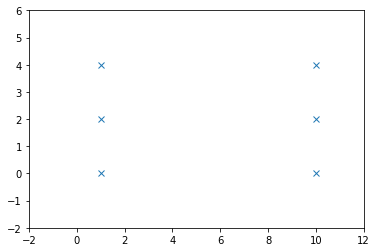

In [18]:
# Plot the data set
plt.plot(X[:,0],X[:,1],'x')
# set reasonable limits
plt.xlim([-2,12])
plt.ylim([-2,6])

(-2.0, 6.0)

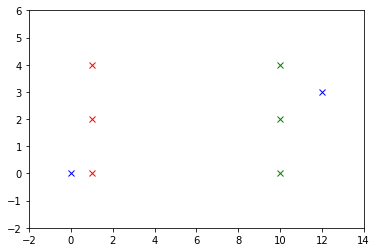

In [17]:
# Plot the data set
plt.plot(X[kmeans.labels_ == 0][:,0],X[kmeans.labels_ == 0][:,1],'gx')
plt.plot(X[kmeans.labels_ == 1][:,0],X[kmeans.labels_ == 1][:,1],'rx')
plt.plot(newvals[:,0],newvals[:,1],'bx')

# set reasonable limits
plt.xlim([-2,14])
plt.ylim([-2,6])

(-2.0, 6.0)

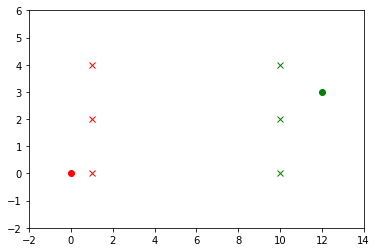

In [19]:
# Plot the data set
plt.plot(X[kmeans.labels_ == 0][:,0],X[kmeans.labels_ == 0][:,1],'gx')
plt.plot(X[kmeans.labels_ == 1][:,0],X[kmeans.labels_ == 1][:,1],'rx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1],'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1],'ro')
         
         
# set reasonable limits
plt.xlim([-2,14])
plt.ylim([-2,6])

(-2.0, 6.0)

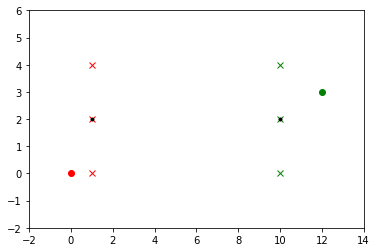

In [21]:
# Plot the data set
plt.plot(X[kmeans.labels_ == 0][:,0],X[kmeans.labels_ == 0][:,1],'gx')
plt.plot(X[kmeans.labels_ == 1][:,0],X[kmeans.labels_ == 1][:,1],'rx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1],'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1],'ro')
plt.plot(cent[:,0], cent[:,1],'k.')

# set reasonable limits
plt.xlim([-2,14])
plt.ylim([-2,6])

### My own data set

In [39]:
#Two centre points
c1 = np.array([1.0,2.0])
c2 = np.array([5.0,12.0])

# Create points randomly around the centre points
c1x = np.random.normal(c1[0],1.0,10)
c1y = np.random.normal(c1[1],1.0,10)
c1p = np.vstack([c1x,c1y]).T



c2x = np.random.normal(c2[0],1.0,10)
c2y = np.random.normal(c2[1],1.0,10)
c2p = np.vstack([c2x,c2y]).T



myX = np.concatenate([c1p,c2p])
np.random.shuffle(myX)
myX

array([[ 4.89877376, 12.11698686],
       [-0.79336523,  2.05347925],
       [ 5.49845706, 11.43324616],
       [-0.02940621,  2.35082978],
       [-0.68636657,  3.23057307],
       [ 1.06869357,  1.81101761],
       [ 0.28949912,  2.8064366 ],
       [ 5.0977072 , 11.05647199],
       [ 3.96336088, 11.73301805],
       [ 1.89927349,  3.069151  ],
       [ 4.57866677, 13.16003789],
       [ 6.00078583, 12.43086947],
       [ 6.02265066, 11.05870261],
       [ 4.74423707, 11.67192233],
       [ 4.58151158, 10.74890506],
       [ 1.82638874,  2.25090597],
       [-0.2548101 ,  1.54341579],
       [ 2.11827411,  0.55924957],
       [ 5.66151776, 12.93510724],
       [ 2.68624609,  2.02521483]])

(-2.0, 16.0)

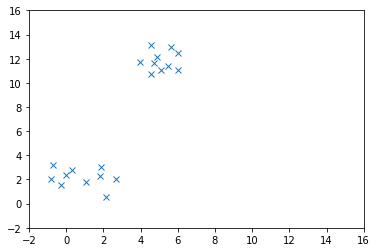

In [40]:
# Plot the data set
plt.plot(myX[:,0],myX[:,1],'x')
# set reasonable limits
plt.xlim([-2,16])
plt.ylim([-2,16])

In [ ]:
mykmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(myX)